In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Cereals1.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


### Ans 1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      76 non-null     object 
 1   mfr       76 non-null     object 
 2   type      76 non-null     object 
 3   calories  76 non-null     int64  
 4   protein   76 non-null     int64  
 5   fat       76 non-null     int64  
 6   sodium    76 non-null     int64  
 7   fiber     76 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     int64  
 10  potass    76 non-null     int64  
 11  vitamins  76 non-null     int64  
 12  shelf     76 non-null     int64  
 13  weight    76 non-null     float64
 14  cups      76 non-null     float64
 15  rating    76 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.6+ KB


In [4]:
num_cols = df.select_dtypes(exclude=['object'])
cat_cols = df.select_dtypes(include=['object'])
num_cols

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
1,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
2,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
3,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
4,110,2,2,180,1.5,10.5,10,70,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
72,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
73,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
74,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [5]:
## 5 number summary
num_cols_sum = num_cols.describe()['min':'max']
num_cols_sum

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,-1.0,-1.0,-1.0,0.0,1.0,0.5,0.25,18.042851
25%,100.0,2.0,0.0,132.5,0.75,12.0,3.0,40.0,25.0,1.0,1.0,0.67,32.932466
50%,110.0,2.5,1.0,180.0,1.75,14.5,7.0,90.0,25.0,2.0,1.0,0.75,40.253086
75%,110.0,3.0,2.0,212.5,3.00,17.0,11.0,120.0,25.0,3.0,1.0,1.00,50.780847
max,160.0,6.0,5.0,320.0,14.00,23.0,15.0,330.0,100.0,3.0,1.5,1.50,93.704912


<AxesSubplot:>

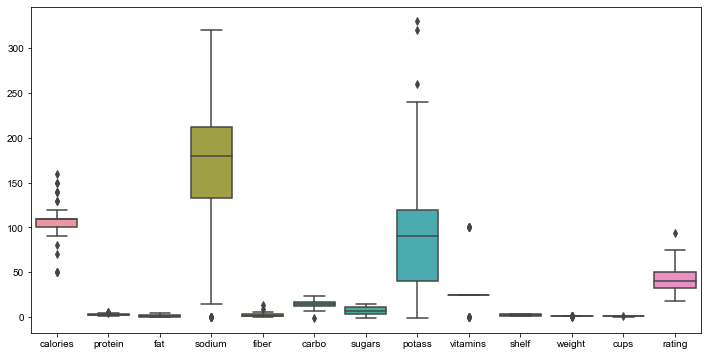

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(data = num_cols)

### Ans 2

In [7]:
## check for NaN values
num_cols.isna().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [8]:
## we do not have any immediate missing values
## what about -1?
num_cols[num_cols == -1].sum()

calories    0.0
protein     0.0
fat         0.0
sodium      0.0
fiber       0.0
carbo      -1.0
sugars     -1.0
potass     -2.0
vitamins    0.0
shelf       0.0
weight      0.0
cups        0.0
rating      0.0
dtype: float64

In [9]:
## 3 columns have missing values, let us replace them with the mean
df.loc[num_cols['carbo'] == -1,'carbo'] = num_cols['carbo'].mean()
df.loc[num_cols['sugars'] == -1,'sugars'] = num_cols['sugars'].mean()
df.loc[num_cols['potass'] == -1,'potass'] = num_cols['potass'].mean()

In [10]:
num_cols = df.select_dtypes(exclude=['object'])

### Ans 3

In [11]:
num_cols_sum = num_cols.describe()['min':'max']
num_cols_sum

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
min,50.0,1.0,0.0,0.0,0.00,7.000000,0.0,15.00,0.0,1.0,0.5,0.25,18.042851
25%,100.0,2.0,0.0,132.5,0.75,12.000000,3.0,43.75,25.0,1.0,1.0,0.67,32.932466
50%,110.0,2.5,1.0,180.0,1.75,14.861842,7.0,90.00,25.0,2.0,1.0,0.75,40.253086
75%,110.0,3.0,2.0,212.5,3.00,17.000000,11.0,120.00,25.0,3.0,1.0,1.00,50.780847
max,160.0,6.0,5.0,320.0,14.00,23.000000,15.0,330.00,100.0,3.0,1.5,1.50,93.704912


<AxesSubplot:>

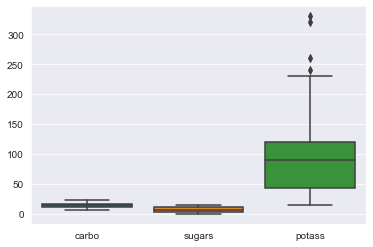

In [12]:
sns.set_style("darkgrid")
sns.boxplot(data = num_cols[['carbo','sugars','potass']])

array([[<AxesSubplot:title={'center':'carbo'}>,
        <AxesSubplot:title={'center':'sugars'}>],
       [<AxesSubplot:title={'center':'potass'}>, <AxesSubplot:>]],
      dtype=object)

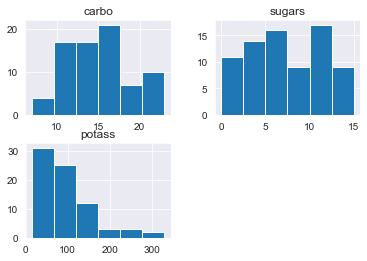

In [13]:
num_cols[['carbo','sugars','potass']].hist(bins = 6)

In [14]:
skewness = num_cols.skew()
skewness[['carbo','sugars','potass']]

carbo     0.270327
sugars    0.036018
potass    1.466663
dtype: float64

### Replacement  
We observe an acceptable amount of skewness in columns of carbo and sugars (<0.5).  
Hence, we can conclude that replacing missing values was a good idea in the above cases.  
  
  However, the data for potass is not uniformly distributed but has an appreciable positive skewness to it.  
  Hence, it would have been more appropriate to replace it missing value with median as it would be a better measure of central tendency of the data.  

### Ans 4

<AxesSubplot:>

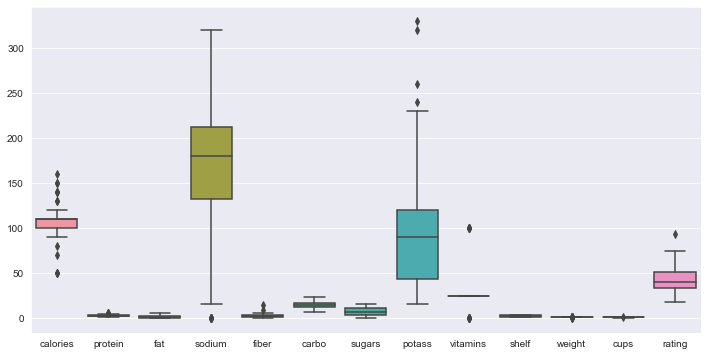

In [15]:
## first of all, we must observe noisy data
fig, ax = plt.subplots(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(data = num_cols)

In [16]:
## We find quite a few outliers in the data. 
## It would be apporpriate to remove outliers 

## Anything above or below 1.5 times quartiles 1 and 3 respectively
## is an outlier.

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)

In [17]:
temp = num_cols.copy()
for feature in num_cols.columns:
    temp.loc[(temp[feature] > upper_whisker[feature]) | (temp[feature] < lower_whisker[feature]), [feature]] = temp[feature].median()

<AxesSubplot:>

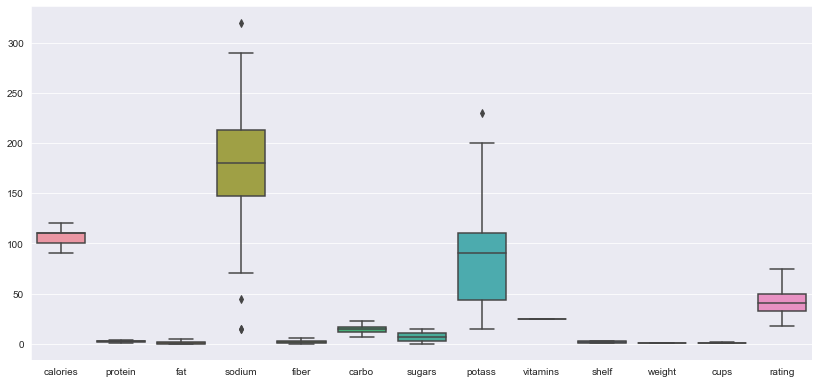

In [18]:
num_cols_processed = temp
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(14,6.5))
sns.boxplot(data=num_cols_processed)

### BAM!  
We have now removed majority of outliers and replaced them with median.  


### Ans 5

In [19]:
num_cols_processed.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.0,76.000000,76.000000
mean,107.236842,2.401316,1.013158,181.381579,1.792105,14.930575,7.038608,85.754155,25.0,2.197368,1.0,0.817632,41.623743
std,8.099166,0.875670,1.013159,60.186370,1.520220,3.737575,4.377048,48.049515,0.0,0.832982,0.0,0.213478,12.464724
min,90.000000,1.000000,0.000000,15.000000,0.000000,7.000000,0.000000,15.000000,25.0,1.000000,1.0,0.250000,18.042851
25%,100.000000,2.000000,0.000000,147.500000,0.750000,12.000000,3.000000,43.750000,25.0,1.000000,1.0,0.670000,32.932466
50%,110.000000,2.250000,1.000000,180.000000,1.625000,14.861842,7.000000,90.000000,25.0,2.000000,1.0,0.750000,40.179526
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,110.000000,25.0,3.000000,1.0,1.000000,50.031833
max,120.000000,4.000000,5.000000,320.000000,6.000000,23.000000,15.000000,230.000000,25.0,3.000000,1.0,1.330000,74.472949


In [20]:
num_cols.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,107.368421,2.526316,1.013158,160.065789,2.048684,14.930575,7.038608,96.148892,28.289474,2.197368,1.030000,0.827500,42.327057
std,19.139378,1.089020,1.013159,84.318813,2.219038,3.737575,4.377048,66.688658,22.487813,0.832982,0.151438,0.227204,13.820602
min,50.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,132.500000,0.750000,12.000000,3.000000,43.750000,25.000000,1.000000,1.000000,0.670000,32.932466
50%,110.000000,2.500000,1.000000,180.000000,1.750000,14.861842,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,2.000000,212.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.780847
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### Success  
We successfully removed most of the outliers from our dataset.  
Most Numeric columns see a reduction in the number of outliers.  
The min,max range has decreased.  
But the quantiles remain roughly the same.  


### Merging Datasets  
now, we need to merge our pre-processed data sets.  
We did not make any changes to cat_cols and all changes made in num_cols are stored and represented in  
num_cols_processed

In [21]:
df_processed = df.copy()
df_processed[num_cols.columns] = num_cols_processed

### Ans 6

In [22]:
df_processed

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Natural_Bran,Q,C,120,3.0,5,15,2.00,8.0,8.0,135.000000,25,3,1.0,1.00,33.983679
1,All-Bran,K,C,110,4.0,1,260,1.75,7.0,5.0,90.000000,25,3,1.0,0.33,59.425505
2,All-Bran_with_Extra_Fiber,K,C,110,4.0,0,140,1.75,8.0,0.0,90.000000,25,3,1.0,0.50,40.253086
3,Almond_Delight,R,C,110,2.0,2,200,1.00,14.0,8.0,93.657895,25,3,1.0,0.75,34.384843
4,Apple_Cinnamon_Cheerios,G,C,110,2.0,2,180,1.50,10.5,10.0,70.000000,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Triples,G,C,110,2.0,1,250,0.00,21.0,3.0,60.000000,25,3,1.0,0.75,39.106174
72,Trix,G,C,110,1.0,1,140,0.00,13.0,12.0,25.000000,25,2,1.0,1.00,27.753301
73,Wheat_Chex,R,C,100,3.0,1,230,3.00,17.0,3.0,115.000000,25,1,1.0,0.67,49.787445
74,Wheaties,G,C,100,3.0,1,200,3.00,17.0,3.0,110.000000,25,1,1.0,1.00,51.592193


In [23]:
## giving meaningful names
df_processed.loc[df_processed['type'] == 'C','type'] = 'Cold'
df_processed.loc[df_processed['type'] == 'H','type'] = 'Hot'
df_processed.loc[df_processed['mfr'] == 'G','mfr'] = 'GeneralMills'
df_processed.loc[df_processed['mfr'] == 'K','mfr'] = 'Kelloggs'
df_processed.loc[df_processed['mfr'] == 'A','mfr'] = 'AHFP'
df_processed.loc[df_processed['mfr'] == 'N','mfr'] = 'Nabisco'
df_processed.loc[df_processed['mfr'] == 'P','mfr'] = 'Post'
df_processed.loc[df_processed['mfr'] == 'Q','mfr'] = 'Quaker'
df_processed.loc[df_processed['mfr'] == 'R','mfr'] = 'RalstonPurina'
pd.crosstab(df_processed['mfr'],df_processed['type'],rownames=['Manufacturer'])

type,Cold,Hot
Manufacturer,,
AHFP,0,1
GeneralMills,22,0
Kelloggs,23,0
Nabisco,4,1
Post,9,0
Quaker,7,1
RalstonPurina,8,0


### Ans 7

In [24]:
sort_rating = df_processed.sort_values(by=['rating'],ascending=False,ignore_index=True)[['name','rating']]
print("Highest Rated Cereal is: %s" % sort_rating.loc[0,'name'])
print("Lowest Rated Cereal is: %s" % sort_rating.loc[sort_rating.shape[0]-1,'name'])

Highest Rated Cereal is: Shredded_Wheat_'n'Bran
Lowest Rated Cereal is: Cap'n'Crunch


### Ans 8

<AxesSubplot:xlabel='type', ylabel='rating'>

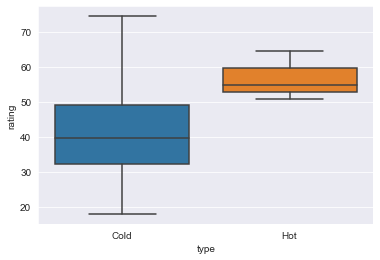

In [25]:
sns.set_style("darkgrid")
sns.boxplot(x='type',y='rating',data=df_processed)

In [26]:
print("Cold", df_processed.loc[df_processed['type'] == 'Cold','rating'].median())
print("Hot", df_processed.loc[df_processed['type'] == 'Hot','rating'].median())

Cold 39.7034
Hot 54.850917


## Conclusion  
Hot Cereals tend to be rated much higher than Cold Cereals

### Ans 9

<AxesSubplot:>

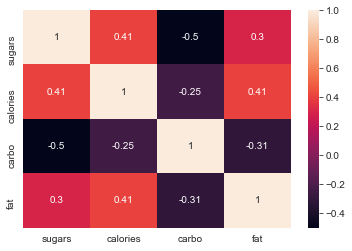

In [27]:
temp = df_processed[['sugars', 'calories', 'carbo','fat']]
corr = temp.corr()
sns.heatmap(data=corr, annot=True)

## BAM!
No multi-collinearity is present between our data.  
Most of our variables are observed to be mildly correlated.  
Since pearson's correlation is a linear correlation, we must analyze the data further.  
This suggests that manufacturers prefer to optimize their cereals for specific nutrients rather than providing a wholemeal.  

### Ans 10

In [28]:
#df_processed.sort_values(by='calories',ascending=True,ignore_index=True).head(5)['mfr']
#pd.pivot_table(df_processed['mfr'],df_processed['calories'])
calories = df_processed.groupby('mfr')['calories'].describe()['mean']
calories = calories.sort_values()
calories

mfr
Nabisco           96.000000
AHFP             100.000000
RalstonPurina    105.000000
GeneralMills     108.181818
Kelloggs         108.260870
Post             108.888889
Quaker           110.000000
Name: mean, dtype: float64

In [29]:
## display complete pivot table 
pd.set_option('display.max_rows', 500)
pd.pivot_table(data=df_processed,index=['mfr','name'])['calories']

mfr            name                                      
AHFP           Maypo                                         100
GeneralMills   Apple_Cinnamon_Cheerios                       110
               Basic_4                                       110
               Cheerios                                      110
               Cinnamon_Toast_Crunch                         120
               Clusters                                      110
               Cocoa_Puffs                                   110
               Count_Chocula                                 110
               Crispy_Wheat_&amp;_Raisins                    100
               Golden_Grahams                                110
               Honey_Nut_Cheerios                            110
               Kix                                           110
               Lucky_Charms                                  110
               Multi-Grain_Cheerios                          100
               Oatmeal_Raisin_Cr

## Flaw in data
The calories mentioned are for one full serving size, but instead, we should 
actually aim to get calories per gram of one serving

In [30]:
## create new column with calories per serving
df_processed['CaloriesPerCup'] = df_processed['calories']*df_processed['cups']
calories = df_processed.groupby('mfr')['CaloriesPerCup'].describe()['mean']
calories = calories.sort_values()
calories

mfr
Post              77.000000
Nabisco           84.120000
Kelloggs          85.956522
GeneralMills      90.909091
Quaker            91.750000
RalstonPurina     92.387500
AHFP             100.000000
Name: mean, dtype: float64

### Ans 11

<AxesSubplot:xlabel='calories', ylabel='rating'>

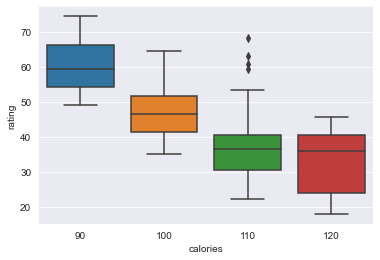

In [31]:
sns.boxplot(data=df_processed, x = 'calories', y = 'rating')

## Trend
A very clear trend where cereals with lower calories tend to be rated higher

In [32]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

In [33]:
corr, _ = pearsonr(df_processed['calories'],df_processed['rating'])
print('Pearsons correlation between calories and rating: %.4f' % corr)

Pearsons correlation between calories and rating: -0.5969


In [34]:
corr, _ = spearmanr(df_processed['calories'],df_processed['rating'])
print('Spearmans correlation between calories and rating: %.4f' % corr)

Spearmans correlation between calories and rating: -0.5590


In [35]:
stat, p, dof, expected = chi2_contingency(df_processed[['calories','rating']])
print("p value is " + str(p))
alpha  = 0.05
if p <= alpha:
    print('Dependent Variables')
else:
    print('Independent Variables')

p value is 3.9974160021519954e-24
Dependent Variables


## Conclusion
### Chi Square Test
Since the Calories category is discrete, we can conduct a chi-square test on the variables.  
The test concludes that the two variables are dependent.  
### On further analysis,  
From both spearman and pearsons correlation test, it is evident that calories and rating are moderately correlated.  

### Ans 12

<AxesSubplot:xlabel='shelf', ylabel='rating'>

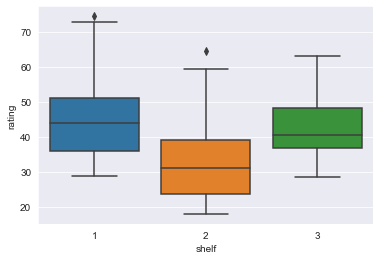

In [36]:
sns.boxplot(data=df_processed, x = 'shelf', y = 'rating')

### Ans 13

<AxesSubplot:xlabel='mfr', ylabel='rating'>

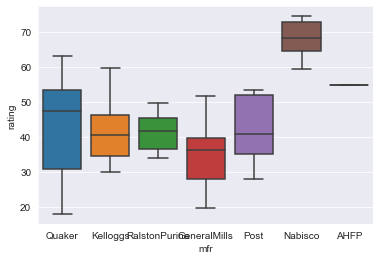

In [37]:
sns.boxplot(data=df_processed, x = 'mfr', y = 'rating')

### Ans 14

In [38]:
nutrients = df_processed[['protein','fat','sodium','fiber','carbo','sugars','potass','vitamins']]

### Ans 15